# Ensemble Techniques

# Part 1

# ***Data Understanding and Exploration***

## ***a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.***

In [3]:
import pandas as pd

In [4]:
# Reading TelcomCustomer-Churn_1.csv file
telcom_customer_df1 = pd.read_csv('TelcomCustomer-Churn_1.csv') 

In [5]:
telcom_customer_df1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes


## ***b. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable***

In [6]:
# Reading TelcomCustomer-Churn_2.csv file
telcom_customer_df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
telcom_customer_df2.head(3)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## ***c. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame***

In [7]:
# Merging the two data frames on key customerID
merged_dataframe = pd.merge(
    telcom_customer_df1, telcom_customer_df2, on='customerID')

In [8]:
merged_dataframe.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [9]:
merged_dataframe.shape

(7043, 21)

## ***d. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.***

In [10]:
# There are various way to achieve this

# Comparing columns in merged data set with first data frame
set(telcom_customer_df1.columns).issubset(merged_dataframe.columns)
# If all the columns of dataframe 1 is present in the merged one then it will return True

True

In [11]:
# Comparing the columns in data set with second data frame
set(telcom_customer_df2.columns).issubset(merged_dataframe.columns)
# If all the columns of dataframe 1 is present in the merged one then it will return True

True

In [12]:
# Can also verify using the matched columns name from data frame 1 agains merged one
telcom_customer_df1.columns.intersection(merged_dataframe.columns)
# Will output the matched columns of df 1 in merged one

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [13]:
telcom_customer_df2.columns.intersection(merged_dataframe.columns)
# Will output the matched columns of df 1 in merged one

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
# will return True since we have already merged the columns
not telcom_customer_df1.columns.intersection(merged_dataframe.columns).empty

True

In [15]:
not telcom_customer_df2.columns.intersection(merged_dataframe.columns).empty

True

In [16]:
# Can also verify with for loop
for col in merged_dataframe.columns:
    if  (col not in telcom_customer_df1.columns and col not in telcom_customer_df2.columns):
        print("Columns are missing")
# Will Print the message only if column are missing in merged datasets from two of them

# ***2. Data Cleaning and Analysis***

## ***a. Impute missing/unexpected values in the DataFrame***

In [17]:
# Checking if there are any null or missing values in our dataframe
# merged_dataframe.isnull().sum()
## Result shows that there are no missing or null values percentage in the dataframe
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()
                       ).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=[
                               'Missing_Number', 'Missing_Percent'])
    return missing_values


missing(merged_dataframe)


,Missing_Number,Missing_Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [18]:
# Looking for data type of our data frame to analyze if data type conversion really required
merged_dataframe.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
# Note: CustomerID will no longer be in-use later
# hence it is better to drop this column
# Also TotalCharges should have been float datatype instead of object
# Need to fix this feature first

# Dropping the customerID from data frame
merged_dataframe.drop(['customerID'], axis='columns', inplace=True)
merged_dataframe.sample(4)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3114,Male,0,No,No,5,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),75.15,392.65,No
5515,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,No
5543,Female,1,No,No,14,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,78.85,1043.8,No
1726,Male,0,Yes,No,30,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,49.90,1441.95,No


In [20]:
# Checking for the TotalCharges feature since it was object and contain empty or useless values like whitespace
merged_dataframe[pd.to_numeric(
    merged_dataframe.TotalCharges, errors='coerce').isnull()]
# Alright, now we can see that the below table contains the list of rows having TotalCharges as null values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
merged_dataframe.shape
# There are 7043 observation or records  and out of these records 11 Records contains no values in their field

(7043, 20)

In [22]:
# Need to correct the format

merged_dataframe = merged_dataframe[merged_dataframe.TotalCharges != ' ']
merged_dataframe.shape

(7032, 20)

In [23]:
merged_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## ***b. Make sure all the variables with continuous values are of ‘Float’ type.***

In [24]:
# In the above code block we have dealt with the incorrect value
# lets correct the data type to numeric since it should not be a object dt for later machine learning models
merged_dataframe.TotalCharges = pd.to_numeric(merged_dataframe.TotalCharges, errors='raise')
# for other continuous values are already in good shape like tenure and monthly charges
# However it is best to change tenure to float datatype
merged_dataframe.tenure = merged_dataframe.tenure.astype(float)

# converted data type and verifying it again
merged_dataframe.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## ***c. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart***

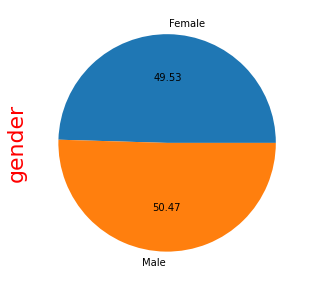

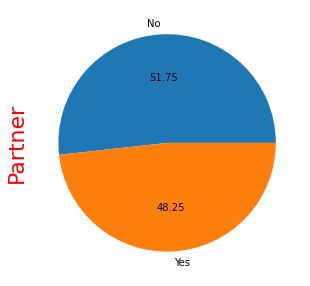

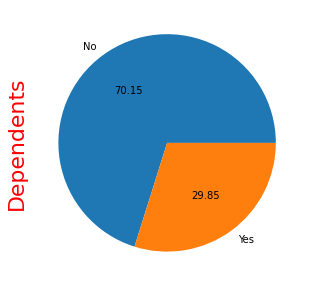

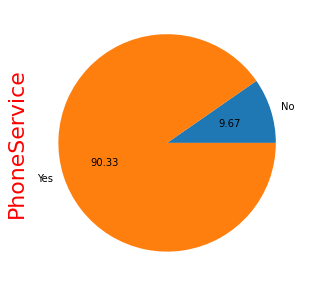

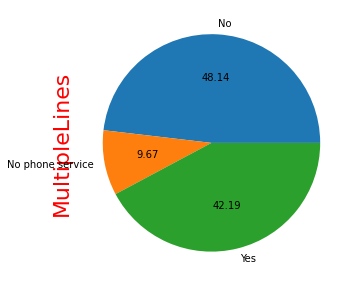

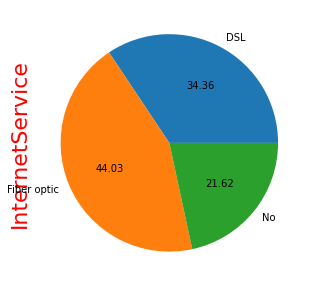

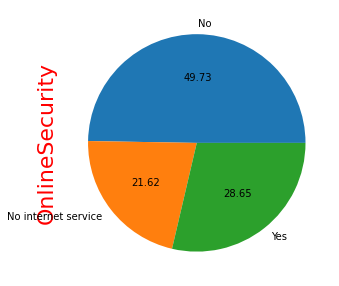

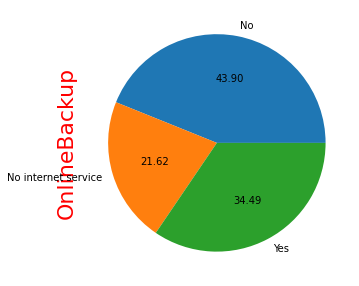

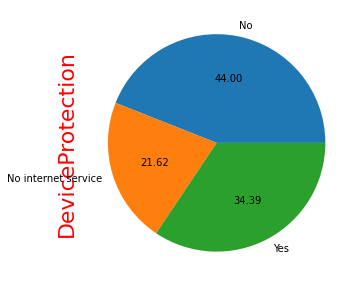

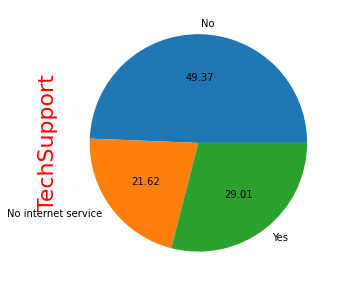

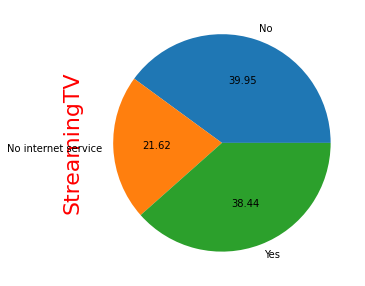

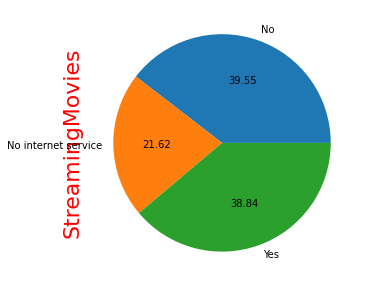

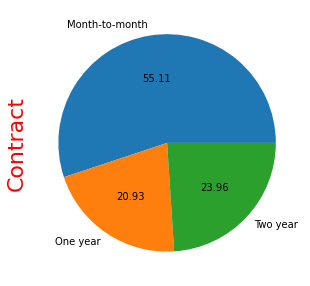

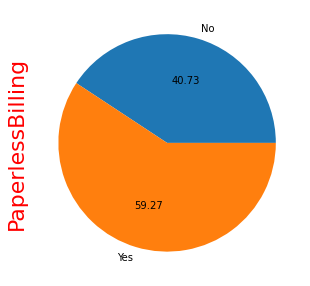

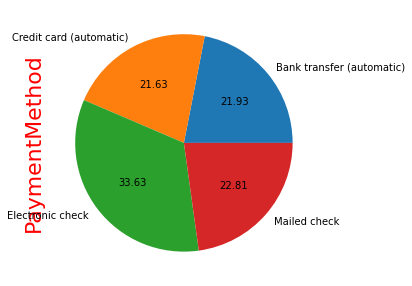

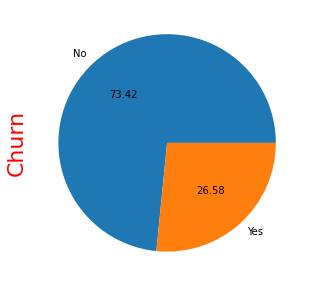

In [25]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
import matplotlib.pyplot as plt

def plotPieChart(df):
    categorical = merged_dataframe.select_dtypes('object').columns
    categorical_columns = merged_dataframe[categorical].nunique()
#     fig, axs = plt.subplots(2,10, figsize=(10, 5))
#     axs = axs.ravel();
    i = 1
    for col in categorical_columns.index:
        fig, axs = plt.subplots(ncols = 1, figsize=(10, 5))
        plt.figure(i)
        df.groupby(col).size().plot(kind='pie', autopct='%.2f')
        axs.set_ylabel(col, size=22)
        axs.yaxis.label.set_color('red')
        axs.xaxis.label.set_color('green')
        axs.spines['bottom'].set_color('red')
        axs.spines['top'].set_color('red')

        i = i+1
    plt.show()


plotPieChart(merged_dataframe)
        



## ***d. Share insights for Q2.b.***

In [26]:
## Total charges had object type and which we changed to float
# Tenure has integer type which we changed to float for avoid probelm in future mode making steps
# We also need to encode the target variable churn to numberic type but we will do later using encoding tech.
# Monthly charges already had a float data type so there was no further action needed over it.

## ***e. Encode all the appropriate Categorical features with the best suitable approach.*** 

In [27]:
# Before encoding these categorical feature values
# lets look at the values in data frame and we will find that 
# we are using No phone service and No internet service as value which is at the end representing "No"
# and "No" already exists in our dataframe rows 
# so replace these both attributes with No
for column in merged_dataframe:
    print(f'- {column}: {merged_dataframe[column].unique()}')


- gender: ['Female' 'Male']
- SeniorCitizen: [0 1]
- Partner: ['Yes' 'No']
- Dependents: ['No' 'Yes']
- tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.]
- PhoneService: ['No' 'Yes']
- MultipleLines: ['No phone service' 'No' 'Yes']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet service']
- DeviceProtection: ['No' 'Yes' 'No internet service']
- TechSupport: ['No' 'Yes' 'No internet service']
- StreamingTV: ['No' 'Yes' 'No internet service']
- StreamingMovies: ['No' 'Yes' 'No internet service']
- Contract: ['Month-to-month' 'One year' 'Two year']
- PaperlessBilling: ['Yes' 'No']
- PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (auto

In [28]:
# Replacing No internet service and No phone service with No
merged_dataframe.replace('No internet service', 'No', inplace=True)
merged_dataframe.replace('No phone service', 'No', inplace=True)

# Lets verify again
for column in merged_dataframe:
    print(f'- {column}: {merged_dataframe[column].unique()}')


- gender: ['Female' 'Male']
- SeniorCitizen: [0 1]
- Partner: ['Yes' 'No']
- Dependents: ['No' 'Yes']
- tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.]
- PhoneService: ['No' 'Yes']
- MultipleLines: ['No' 'Yes']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes']
- OnlineBackup: ['Yes' 'No']
- DeviceProtection: ['No' 'Yes']
- TechSupport: ['No' 'Yes']
- StreamingTV: ['No' 'Yes']
- StreamingMovies: ['No' 'Yes']
- Contract: ['Month-to-month' 'One year' 'Two year']
- PaperlessBilling: ['Yes' 'No']
- PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
- MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
- TotalCharges: [  29.85 1889.5   108.15 ...  346.45  3

In [29]:
# Lets encode the categorical column with two distinct values to 1 and 0 (Yes and No) and same goes for gender
categ_value_with_two_vals = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'gender']

# Creating a dictionary for our specific replacement 
replace_vals = {'Yes': 1, 'No': 0, 'Male': 1,'Female': 0}
for col in categ_value_with_two_vals:
    merged_dataframe[col].replace(replace_vals, inplace=True)

In [30]:
# Lets verify again
for column in merged_dataframe:
    print(f'- {column}: {merged_dataframe[column].unique()}')
# Great, now we have similar kind of values which will no longer be a constraint in our model building


- gender: [0 1]
- SeniorCitizen: [0 1]
- Partner: [1 0]
- Dependents: [0 1]
- tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.]
- PhoneService: [0 1]
- MultipleLines: [0 1]
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: [0 1]
- OnlineBackup: [1 0]
- DeviceProtection: [0 1]
- TechSupport: [0 1]
- StreamingTV: [0 1]
- StreamingMovies: [0 1]
- Contract: ['Month-to-month' 'One year' 'Two year']
- PaperlessBilling: [1 0]
- PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
- MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
- TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
- Churn: [0 1]


## ***f. Split the data into 80% train and 20% test.***

In [31]:
from sklearn.model_selection import train_test_split

X = merged_dataframe.drop(['Churn'], axis='columns')
y = merged_dataframe.Churn

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)

X_train.shape


(5625, 19)

## ***g. Normalize/Standardize the data with the best suitable approach.***

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df = pd.get_dummies(merged_dataframe)
X = df.drop(columns=['Churn'])
y = df['Churn'].values

Scaler = StandardScaler()

X = Scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


def implementing_model(argModel):
    model = argModel
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, cv=6)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print('Train score of '+str(argModel)[:-2]+' is', score.mean(), '%')
    print('--')
    print('Precision score is ', precision)
    print('--')
    print('ROC Score is', roc)
    print('--')
    print('Recall Score is ', recall)
    print('--')
    print('Confusion Matrix\n\n', cm)

implementing_model(SVC())
implementing_model(KNeighborsClassifier())



Train score of SVC is 0.8003574898794638 %
--
Precision score is  0.6135593220338983
--
ROC Score is 0.6867995195966268
--
Recall Score is  0.4839572192513369
--
Confusion Matrix

 [[919 114]
 [193 181]]
Train score of KNeighborsClassifier is 0.7699596619737114 %
--
Precision score is  0.5362318840579711
--
ROC Score is 0.6698818663256906
--
Recall Score is  0.4946524064171123
--
Confusion Matrix

 [[873 160]
 [189 185]]


# 3. Model building and Improvement:

In [33]:
# Importing all the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# models
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator  # for custom estimators
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import fbeta_score, make_scorer
# -------------------------------------

# imbalanced-learn
# if using imblearn's sampling we must use this over sklearn's Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler  # oversampling
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks, NearMiss, RandomUnderSampler  # undersampling

import warnings
warnings.filterwarnings('ignore')


## ***a. Train a model using XGBoost and use RandomizedSearchCV to train on best parameters. Also print best performing parameters along with train and test performance.*** 

In [34]:
# Using XGBoost and RandomizedSearchCV
X = merged_dataframe.drop("Churn", axis=1)
y = merged_dataframe["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2)

# define categorical features & initialize encoder
cat_feats = X_train.columns[X_train.dtypes == 'object']

onehot_encoder = OneHotEncoder() 

# define numeric features & initialize scaler
num_feats = ["tenure", "TotalCharges", "MonthlyCharges"]
scaler = StandardScaler()



ct = ColumnTransformer([('cat_feats', onehot_encoder, cat_feats),
                        ('num_feats', scaler, num_feats)])

model = XGBClassifier(learning_rate=0.02,
                      n_estimators=200,
                      booster='gbtree',
                      objective='binary:logistic')

pipe = Pipeline([("preprocessing", ct),
                ("sampling", RandomOverSampler()),
                ("xgb", model)])

tuned_parameters = {
    'xgb__min_child_weight': [1, 5, 10],
    'xgb__gamma': [0.5, 1, 1.5, 2, 5, 10],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__max_depth': [3, 5, 8]
}

kf = StratifiedKFold(n_splits=5)

grid = RandomizedSearchCV(estimator=pipe,
                          param_distributions=tuned_parameters,
                          cv=kf,
                          n_iter=20,
                          scoring='f1',
                          n_jobs=-1,
                          verbose=3)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[22:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat_feats',
                                                                               OneHotEncoder(),
                                                                               Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')),
                                                                              ('num_feats',
                                                                               StandardScaler(),
                                                                               ['tenure',
                                                                                'TotalCharges',
                                                                                'MonthlyCharges'])])),
                                 

In [35]:
preds = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, preds))

## We were able to achieve above 80% recall, 50% precision, and 0.65 f1 by XGBoost. 
# This equates to correctly identifying 80% of customer churn cases


              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1031
           1       0.52      0.82      0.63       376

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



## ***b. Train a model using XGBoost and use GridSearchCV to train on best parameters. Also print best performing parameters along with train and test performance***

In [36]:
# Using XGBoost and GridSearchCV
X = merged_dataframe.drop("Churn", axis=1)
y = merged_dataframe["Churn"]

# define categorical features & initialize encoder
cat_feats = X_train.columns[X_train.dtypes == 'object']
X_encoded = pd.get_dummies(X, columns=cat_feats)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, stratify=y, test_size=0.3, random_state=24)



onehot_encoder = OneHotEncoder()

# define numeric features & initialize scaler
num_feats = ["tenure", "TotalCharges", "MonthlyCharges"]
scaler = StandardScaler()


ct = ColumnTransformer([('cat_feats', onehot_encoder, cat_feats),
                        ('num_feats', scaler, num_feats)])

model = XGBClassifier(objective='binary:logistic',
                      missing=None,
                      seed=24)
model.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])
                      


[0]	validation_0-aucpr:0.62553
[1]	validation_0-aucpr:0.62400
[2]	validation_0-aucpr:0.64336
[3]	validation_0-aucpr:0.64428
[4]	validation_0-aucpr:0.65141
[5]	validation_0-aucpr:0.64593
[6]	validation_0-aucpr:0.64106
[7]	validation_0-aucpr:0.64081
[8]	validation_0-aucpr:0.64099
[9]	validation_0-aucpr:0.64419
[10]	validation_0-aucpr:0.64416
[11]	validation_0-aucpr:0.64102
[12]	validation_0-aucpr:0.64087
[13]	validation_0-aucpr:0.63563
[14]	validation_0-aucpr:0.63631


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=24,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=24,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [37]:
pipe = Pipeline([("preprocessing", ct),
                ("sampling", RandomOverSampler()),
                ("xgb", model)])


# Tweaking the parameters for handling Class Imbalance in Dataset
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0, 1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}

xgb_estimator = XGBClassifier(objective='binary:logistic',
                              seed=24,
                              subsample=0.9,
                              colsample_bytree=0.5)


clf_xgb_tuned = GridSearchCV(estimator=xgb_estimator,
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=2,
                             n_jobs=-1,
                             cv=StratifiedKFold(
                                 n_splits=3, shuffle=True, random_state=24)
                             )
clf_xgb_tuned.fit(X_train,
                  y_train,
                  verbose=True,
                  early_stopping_rounds=10,
                  eval_metric='aucpr',
                  eval_set=[(X_test, y_test)]
                  )


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[0]	validation_0-aucpr:0.58325
[1]	validation_0-aucpr:0.61399
[2]	validation_0-aucpr:0.61034
[3]	validation_0-aucpr:0.63652
[4]	validation_0-aucpr:0.63857
[5]	validation_0-aucpr:0.64051
[6]	validation_0-aucpr:0.63930
[7]	validation_0-aucpr:0.63956
[8]	validation_0-aucpr:0.64167
[9]	validation_0-aucpr:0.64596
[10]	validation_0-aucpr:0.64301
[11]	validation_0-aucpr:0.64185
[12]	validation_0-aucpr:0.64114
[13]	validation_0-aucpr:0.63922
[14]	validation_0-aucpr:0.63891
[15]	validation_0-aucpr:0.63866
[16]	validation_0-aucpr:0.63914
[17]	validation_0-aucpr:0.64030
[18]	validation_0-aucpr:0.64166


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_ch...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=24, subsample=0.9, tree_method=None,
                

In [38]:
# Classification result of tuned params
y_pred = clf_xgb_tuned.predict(X_test)
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1737
           1       0.43      0.65      0.52       373

    accuracy                           0.79      2110
   macro avg       0.67      0.73      0.69      2110
weighted avg       0.83      0.79      0.80      2110



# Part 2

## ***Build a simple ML pipeline which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1***
## Create separate functions for various purposes.
## Various base models should be trained to select the best performing model.
## Pickle file should be saved for the best performing model.

# New Part B

In [39]:
#Importing all the modules

import warnings
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks, NearMiss, RandomUnderSampler  # undersampling
from imblearn.over_sampling import SMOTE, RandomOverSampler  # oversampling
from imblearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator  # for custom estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

import pickle

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


# models

# model selection

# model evaluation
# -------------------------------------

# imbalanced-learn
# if using imblearn's sampling we must use this over sklearn's Pipeline

warnings.filterwarnings('ignore')


In [40]:
# Method for reading a csv file
from functools import reduce
from sklearn import metrics
import enum
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_float_dtype
def read_csv_file(file_name):
    try:
        return pd.read_csv(file_name)
    except Exception as e:
        print("An exception occurred: ", e)
        return False


# Method for merging csv files in to one based on the column name
def merge_csv_files(key_name, *args):
    global read_list
    try:
        for xfile in args:
            read_list.append(pd.read_csv(xfile))
        return reduce(lambda left, right: pd.merge(left, right, on=key_name), read_list)
    except Exception as e:
        print("An exception occurred: ", e)
        return False

# Method to verify if the two different dataframe has been merged
def is_data_frame_merged(df1, df2, merged_df):
    return set(df1.columns).issubset(merged_df) and set(df2.columns).issubset(merged_df)


# Method for checking null in dataframe
def check_for_null(df):
    return df.isnull().values.ravel().sum()


# Method for checking different data types
def check_dtypes(df, column_name, dtype):
    if not isinstance(dtype, Mydtype):
        raise TypeError('dtype must be an instance of Mydtype Enum')
    try:
        if (dtype == Mydtype.TO_OBJECT):
            return is_string_dtype(df[column_name])
        if (dtype == Mydtype.TO_NUMERIC):
            return is_numeric_dtype(df[column_name])
        if (dtype == Mydtype.TO_FLOAT):
            return is_numeric_dtype(df[column_name])
    except Exception as e:
        print("An exception occurred: ", e)
        return False


# Method for dropping specefic column name
def drop_column(df, column_name, type='columns'):
    try:
        print("Dropping column name", column_name)
        return df.drop([column_name], axis=type, inplace=True)
    except Exception as e:
        print("An exception occurred: ", e)
        return False


# Method for getting total sum of null values in the dataframe
def get_null_count_df(df, col_name):
    try:
        return df[pd.to_numeric(
            df[col_name], errors='coerce').isnull()][col_name].count()
    except Exception as e:
        print("An exception occurred: ", e)
        return False

# Method for cleaning dataframe


def cleaning_empty_val(df, col_name):
    try:
        return df[df[col_name] != ' ']
    except Exception as e:
        print("An exception occurred: ", e)
        return False


# Creating an enum for safe parameterized control over method
class Mydtype(enum.Enum):
    TO_NUMERIC = 'TO_NUMERIC'
    TO_FLOAT = 'TO_FLOAT'
    TO_OBJECT = 'TO_OBJECT'



# Method of manipulating the data type
def changing_dtype(df, col_name, to_dtype):
    if not isinstance(to_dtype, Mydtype):
        raise TypeError('dtype must be an instance of Mydtype Enum')
    try:
        if (to_dtype == Mydtype.TO_NUMERIC):
            df[col_name] = pd.to_numeric(df[col_name], errors='raise')

        if (to_dtype == Mydtype.TO_FLOAT):
            df[col_name] = df[col_name].astype(float)

        if (to_dtype == Mydtype.TO_OBJECT):
            df[col_name] = df[col_name].astype(str)
        return df
    except Exception as e:
        print("An exception occurred: ", e)
        return False


# Method for replacing values in data frame
def replace_values_df(df, source_val, replace_with):
    try:
        df.replace(source_val, replace_with, inplace=True)
    except Exception as e:
        print("An exception occurred: ", e)
        return False


# Method for encoding categorical value in dataframe columns
def encode_cat_col(df, cat_col_hashmap, replace_with_hashmap):
    try:
        for col in cat_col_hashmap:
         df[col].replace(replace_with_hashmap, inplace=True)
        return df
    except Exception as e:
        print("An exception occurred: ", e)
        return False


# Method for splitting dataframe into x and y
def splitting_data(df, test_size_arg):
    df = pd.get_dummies(df)
    X = df.drop(['Churn'], axis='columns')
    y = df.Churn
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size_arg, shuffle=True, random_state=42)
    return [X_train, X_test, y_train, y_test]


# Method for creating a pipeline

def creating_pipline(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_predict = pipeline.predict(X_test)
    model_score = pipeline.score(X_test, y_test)
    print(model_score)
    print(metrics.confusion_matrix(y_test, y_predict))


# Method for normalizing data
def normalizing_data(df, cols_to_scale, Scaler=StandardScaler()):
    df = pd.get_dummies(df)
    X = df.drop(columns=['Churn'])
    y = df['Churn'].values
    X = Scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    return [X_train, X_test, y_train, y_test]


# Generic method for Implementing any models
def implementing_model(argModel, X_train, y_train, X_test, y_test):
    model = argModel
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_train = cross_val_score(model, X_train, y_train, cv=6)
    score_test = cross_val_score(model, X_test, y_test, cv=6)

    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Result for: ", str(argModel)[:-2])
    print(argModel)
    ## Test accuracy should not be higher than train since the model is optimized for the latter
    print('Train score of '+str(argModel)[:-2]+' is', score_train.mean(), '%')
    print('Test score of '+str(argModel)[:-2]+' is', score_test.mean(), '%')
    print('--')
    print('Precision score is ', precision)
    print('--')
    print('ROC Score is', roc)
    print('--')
    print('Recall Score is ', recall)
    print('--')
    print('Confusion Matrix\n\n', cm)
    print("--------------------------------")
    results.append(
        {'key': str(argModel)[:-2],'val': score_train.mean() * 100,'model': model})


# Method for saving pickle file
def saving_pickle_file(filename, best_model):
    try:
        filename_r = open(filename, 'wb')
        pickle.dump(best_model, filename_r)
    except Exception as e:
        print("An exception occurred: ", e)
        return False


# Method for loading pickle file and printing result
def loading_pickle_file(filename, X_test, Y_test):
    try:
        # load the model from disk
        print("Reading file", filename)
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.score(X_test, Y_test)
        print("Training score from saved file is ", result.mean() * 100)
    except Exception as e:
        print("An exception occurred: ", e)
        return False


## AGGREGATING SUM Methods

## preparing a datframe from different csv files

def prepare_dataframe(key_name, list_of_files):
    return  merge_csv_files(key_name, *list_of_files)


## ---------- EDA and Data preprocessing --------------
def data_preprocessing(df):
    
    # Checking if data frame has null values
    if (check_for_null(df)):
        print("Data Frame has null values of count", check_for_null(df))
    else:
        print("DataFrame has no null values!")
    
    # Dropping columns
    for each_col in column_name_to_drop:
        drop_column(df, each_col)

    ## Checking data type for columns
    for each_col in datatype_to_check:
        if(check_dtypes(df, each_col['col'], each_col['col_type'])):
            print(f"{ each_col['col']} has {each_col['col_type']} type")
        else:
            print(f"{ each_col['col']} has no {each_col['col_type']} type")

    # Checking if column has blank values
        ## Checking data type for columns
    for each_col in column_to_check_for_null:
        blank_val = get_null_count_df(df, each_col)
        if(blank_val > 0):
            print(f"{ each_col } has {blank_val} blank value")
            print(f"Cleaning {each_col} blank values from dataframe!")
            df = cleaning_empty_val(df, each_col)
        else:
            print(f"{ each_col['col']} has no {each_col['col_type']} type")
    
    # Changing data type
    for each_col in datatype_to_change:
        print(f"Changing data type of {each_col['col']} to {each_col['col_type']} ")
        df= changing_dtype(df, each_col['col'], each_col['col_type'])
        print(
            f"Data type of {each_col['col']} changed to {df[each_col['col']].dtypes} ")

    # Replacing source string to another filling string
    for each_col in col_value_replace:
        print(
            f"Replacing {each_col['source']} to {each_col['target']} ")
        replace_values_df(df, each_col['source'],each_col['target'])

    # Encoding categorical values
    print("Encoding categorical column values {YES NO} to {1, 0} ")
    df = encode_cat_col(df, categorical_cols, categorical_cols_replacement)
    
    return df

# Modularizing the various methods

In [41]:

##==========ENDING OF UTILITY METHODS AND STARING OF MAIN METHOD-------------------


# SCRIPT CONFIGURATIONS
read_list = []
column_name_to_drop = ["customerID"]
datatype_to_check = [{'col': 'TotalCharges', 'col_type':  Mydtype.TO_NUMERIC}]
datatype_to_change = [{'col': 'TotalCharges', 'col_type': Mydtype.TO_NUMERIC}]
column_to_check_for_null = ['TotalCharges'];
col_value_replace = [
    {'source': 'No internet service', 'target': 'No'},
    {'source': 'No phone service', 'target': 'No'}
    ]
# Creating a dictionary for our specific replacement
categorical_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'gender']

categorical_cols_replacement = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}

# Pipline configuration
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])
# Columns to scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

## Models to implements
models_list = [SVC(), KNeighborsClassifier(),
               RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier()]
results = [] # For storing Model details and scores


## --- Data splitting and model training------------------

##------------ main function-------------------

def main():
           
    # Preparing data frame from various csv files
    data_frame = prepare_dataframe('customerID', ['TelcomCustomer-Churn_1.csv','TelcomCustomer-Churn_2.csv'])

    # Checking if data frame has been merged
    if (is_data_frame_merged(read_list[0], read_list[1], data_frame)):
        print("DataFrame has been merged successfully!")
    else:
        print("Failed to merge DataFrame!")
    
    # EDA
    data_frame = data_preprocessing(data_frame)

    # Splitting Data and Model Test and Train operation    
    # Destructing variables from list
    # method args => data frame, test_size
    [X_train, X_test, y_train, y_test] = splitting_data(data_frame, 0.2)

    # Normalizing and Standardizing the data
    [X_train, X_test, y_train, y_test] = normalizing_data(
        data_frame, cols_to_scale, Scaler=StandardScaler())

    # Creating pipeline
    creating_pipline(pipeline, X_train, X_test, y_train, y_test)

    ## Implementing the model
    for each_model in models_list:
        implementing_model(each_model, X_train, y_train, X_test, y_test)

    # Checking the best score in the result models
    # final_model_tosave = max(results, key=lambda k: results[k])
    # print(final_model_tosave)
    final_result = max([[x['key'], x['val'], x['model']] for x in results])
    print(f"Saving {final_result[0]} as a best fitting model to pickle since it has best training score with {final_result[1]}")

    ## Saving model to pickle for later use
    saving_pickle_file('Pickle_'+final_result[0]+ ".pkl", final_result[2] )

    # Reading saved model from pickle
    loading_pickle_file('Pickle_'+final_result[0] + ".pkl", X_train, y_train)


    



# Calling main() function to execute all the sub methods
main()


DataFrame has been merged successfully!
DataFrame has no null values!
Dropping column name customerID
TotalCharges has no Mydtype.TO_NUMERIC type
TotalCharges has 11 blank value
Cleaning TotalCharges blank values from dataframe!
Changing data type of TotalCharges to Mydtype.TO_NUMERIC 
Data type of TotalCharges changed to float64 
Replacing No internet service to No 
Replacing No phone service to No 
Encoding categorical column values {YES NO} to {1, 0} 
0.7882018479033405
[[916 117]
 [181 193]]
Result for:  SVC
SVC()
Train score of SVC is 0.8003574898794638 %
Test score of SVC is 0.7896193247257077 %
--
Precision score is  0.6135593220338983
--
ROC Score is 0.6867995195966268
--
Recall Score is  0.4839572192513369
--
Confusion Matrix

 [[919 114]
 [193 181]]
--------------------------------
Result for:  KNeighborsClassifier
KNeighborsClassifier()
Train score of KNeighborsClassifier is 0.7699596619737114 %
Test score of KNeighborsClassifier is 0.7306146572104019 %
--
Precision score is